In [25]:
# 两个问题的回答 Do I answer these two questions correctly?
# threshold之后 画出来一大堆空白，设为0，再去log不就？？  
# 最后的范围到正的40
#  i can hear clearly the word(Vokale und Konsonanten), when the speech signal processed by the Vocoder, 
# but I can't hear the melody of the music, when music after the preprocessing of CI Vocoder,
# 圈圈在上层 

start recording...
stop recording。


In [198]:
import sounddevice as sd
import numpy as np
from scipy.io.wavfile import write, read # 保存录音为文件

fs = 21000  # 采样率
duration = 3  # 录音时长（s）

print("start recording...")
recorded_voice = sd.rec(int(duration * fs), samplerate=fs, channels=1)
sd.wait()  # 等待录音完成
print("stop recording。")

write("neuroprosthetics_19.wav", fs, recorded_voice) #neuroprosthetics_pro
# write("voice_task_breakfast.wav", fs, recorded_voice)

start recording...
stop recording。


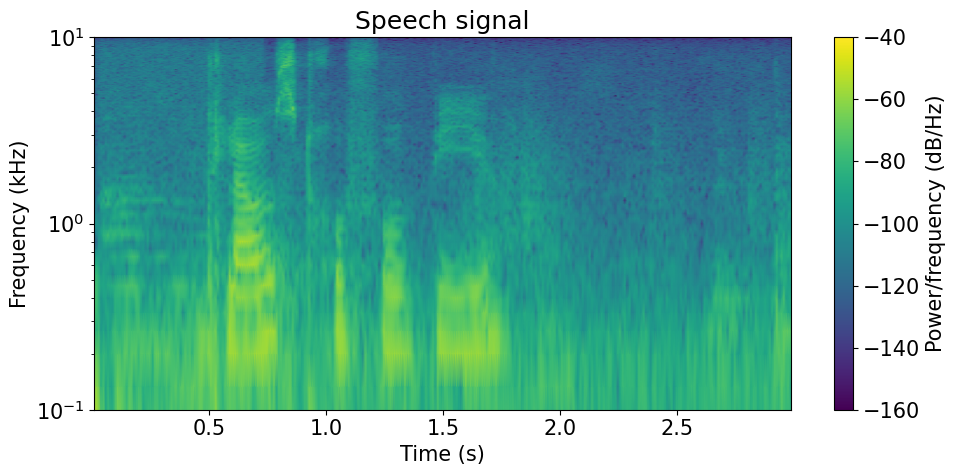

In [13]:
# 1. 录音原音 画图
import numpy as np
from scipy.io.wavfile import write, read # 保存录音为文件
import matplotlib.pyplot as plt
from scipy.signal import spectrogram #频谱图(time)
fs=21000
# fs, recorded_voice_from_file = read("myrecording.wav")
recorded_voice_from_file = np.load("recorded_word.npy").flatten()


window_samples = int(0.015 * fs)  # 15 ms  将时间窗口和重叠转换为样本数
overlap_samples = int(0.005 * fs)  # 5 ms

frequencies, times, Sxx = spectrogram(recorded_voice_from_file, fs, nperseg=window_samples, noverlap=overlap_samples)
plt.figure(figsize=(10, 5))
plt.ylabel('Frequency (kHz)')
plt.xlabel('Time (s)')
c = plt.pcolormesh(times, frequencies*1e-3, 10 * np.log10(Sxx), shading='gouraud', vmin=-160, vmax=-40)
plt.colorbar(c, label='Power/frequency (dB/Hz)')
plt.yscale('log') # 设置对数刻度的y轴 使用对数刻度来更清晰地展示低频范围
plt.ylim(0.1, 10)
plt.yticks([0.1, 1, 10], ['$10^{-1}$', '$10^{0}$', '$10^{1}$']) # 使用LaTeX语法设置y轴的刻度标签
plt.title("Speech signal")
plt.tight_layout()
plt.rcParams.update({'font.size': 14})
plt.show()

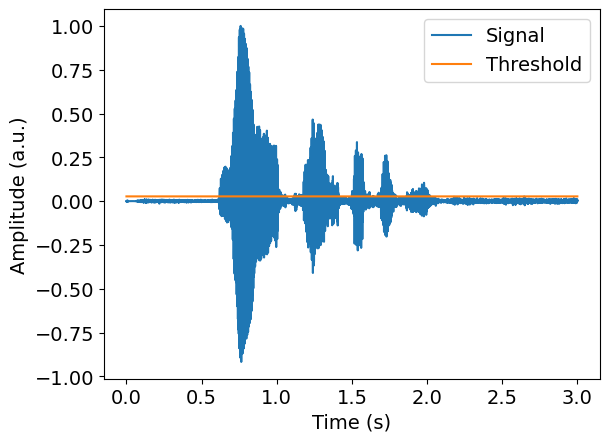

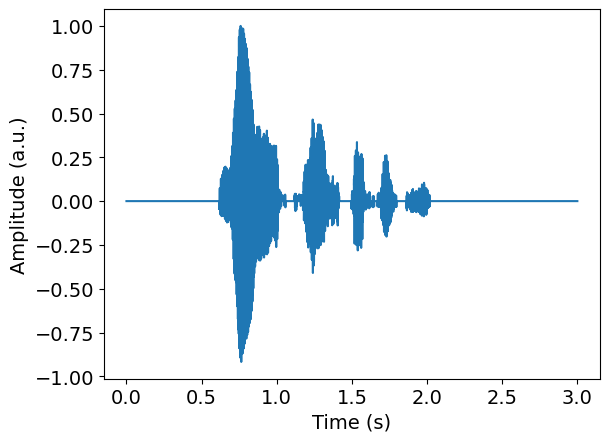

In [4]:
fs, recorded_voice = read("neuroprosthetics_19.wav")
recorded_voice = recorded_voice / np.max(recorded_voice)
time = np.arange(0, 3, 1/fs)
thr = 0.027 # in amplitude
plt.plot(time, recorded_voice, label='Signal')
plt.plot(time, np.zeros(time.shape)+thr, label='Threshold')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (a.u.)')
plt.legend()
plt.show()

# 阈值处理，thr 是需要设置的阈值
# thr = 0.001 # in amplitude
# positive_infinity = float('inf')
# negative_infinity = float('-inf')

# thresholded_voice = np.where(abs(recorded_voice) < thr, 0, recorded_voice) #recorded_voice[abs(recorded_voice) < thr] = 0

thresholded_voice = recorded_voice.copy()
mask = abs(thresholded_voice) < thr
thresholded_voice[mask] = thresholded_voice[mask] * 0.00001

write('thresholded_voice_19.wav', fs, thresholded_voice)
plt.figure()
plt.plot(time, thresholded_voice)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (a.u.)')
plt.show()

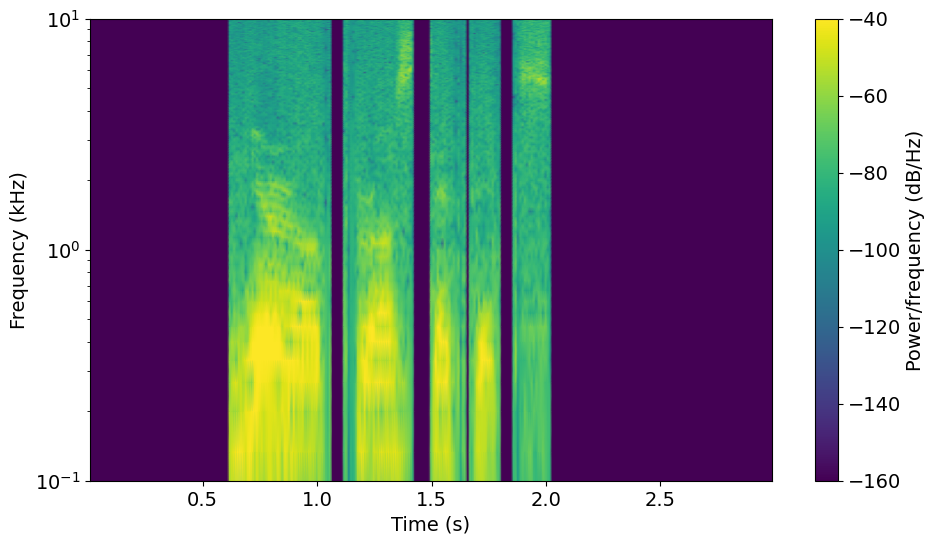

In [5]:
# fs, thresholded_voice = read("thresholded_voice_15.wav")

# 将时间窗口和重叠转换为样本数
window_samples = int(0.015 * fs)  # 15 ms
overlap_samples = int(0.005 * fs)  # 5 ms

frequencies, times, Sxx = spectrogram(thresholded_voice, fs=fs, nperseg=window_samples, noverlap=overlap_samples)
plt.figure(figsize=(11, 6))
plt.ylabel('Frequency (kHz)')
plt.xlabel('Time (s)')
c = plt.pcolormesh(times, frequencies*1e-3, 10 * np.log10(Sxx), shading='gouraud', vmin=-160, vmax=-40)
plt.colorbar(c, label='Power/frequency (dB/Hz)')
plt.yscale('log')
plt.ylim(0.1, 10)
plt.title("")
#plt.yticks([0.1, 1, 10], ['$10^{-1}$', '$10^{0}$', '$10^{1}$']) # 使用LaTeX语法设置y轴的刻度标签
plt.show()

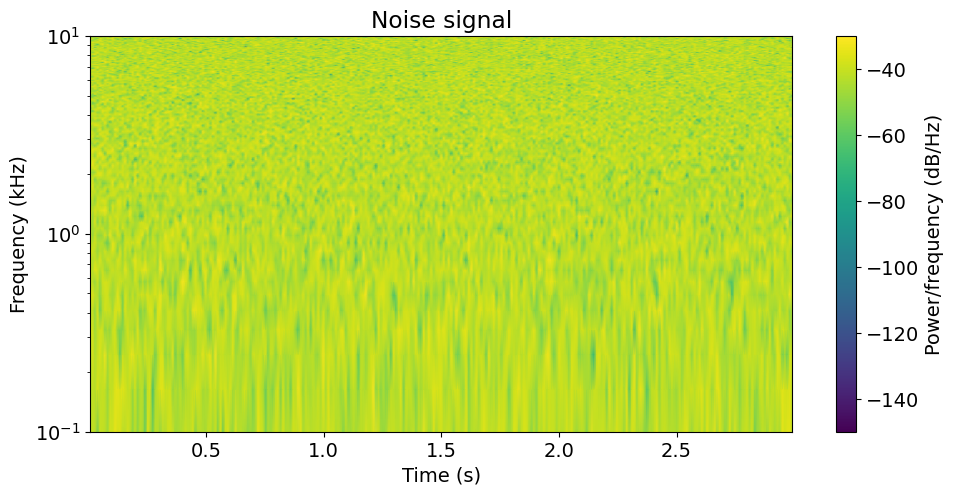

In [6]:
# 生成白噪声
import numpy as np
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

sampling_rate, speech_signal = read("Neuroprosthetics_pro.wav")

white_noise = np.random.normal(0, 1, speech_signal.shape) #同维度

frequencies, times, Sxx = spectrogram(white_noise.flatten(), fs=sampling_rate)

plt.figure(figsize=(10, 5))
plt.ylabel('Frequency (kHz)')
plt.xlabel('Time (s)')
c = plt.pcolormesh(times, frequencies*1e-3, 10 * np.log10(Sxx), shading='gouraud', vmin=-150, vmax=-30)
plt.colorbar(c, label='Power/frequency (dB/Hz)')
plt.yscale('log') # 设置对数刻度的y轴 使用对数刻度来更清晰地展示低频范围
plt.ylim(0.1, 10)
plt.yticks([0.1, 1, 10], ['$10^{-1}$', '$10^{0}$', '$10^{1}$']) # 使用LaTeX语法设置y轴的刻度标签
plt.tight_layout()
plt.title("Noise signal")
plt.rcParams.update({'font.size': 14})
plt.show()

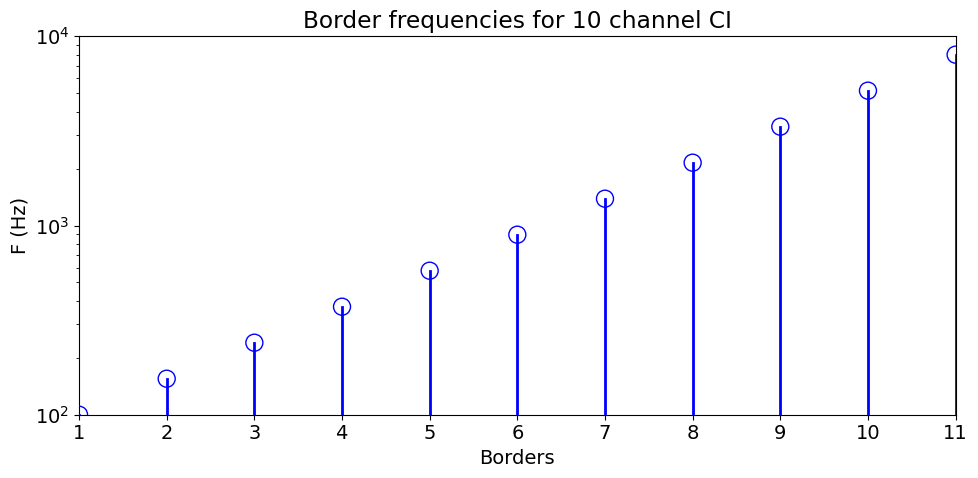

In [7]:
# 2. filter bank 
import numpy as np
from scipy.signal import butter, freqz
import matplotlib.pyplot as plt

start_freq = 100  
end_freq = 8000 
num_filters = 10  
border_frequencies = np.logspace(np.log10(start_freq), np.log10(end_freq), num_filters + 1) #生成对数


plt.figure(figsize=(10, 5))
for i in range(1, num_filters + 2):
    x_start, y_start = i, 0  # Start at (2, 0)
    x_end, y_end = i, border_frequencies[i-1] 
    plt.plot([x_start, x_end], [y_start, y_end], color='blue', linewidth=2)
    plt.scatter(x_end, y_end, s=150, facecolors='none', edgecolors='blue', zorder=2)
plt.xticks(range(1, len(border_frequencies) + 1))
plt.xlim(1, 11)
plt.yscale('log') 
plt.ylim(100, 10000)
plt.yticks([100, 1000, 10000], ['$10^{2}$', '$10^{3}$', '$10^{4}$'])
plt.xlabel('Borders')
plt.ylabel('F (Hz)')
plt.title('Border frequencies for 10 channel CI')
# 设置坐标轴的zorder，使其在网格之上，在线和圆圈之下
plt.gca().spines['bottom'].set_zorder(1)
plt.gca().spines['left'].set_zorder(1)
plt.gca().spines['right'].set_zorder(1)
plt.tight_layout()
plt.title("Border frequencies for 10 channel CI")
plt.rcParams.update({'font.size': 14})
plt.show()

/var/folders/ng/0r0wq8mx5_72g6njtjb8fwb40000gn/T/ipykernel_32278/842767494.py:15: RuntimeWarning: divide by zero encountered in log10
  magnitude_response = 20 * np.log10(abs(h))


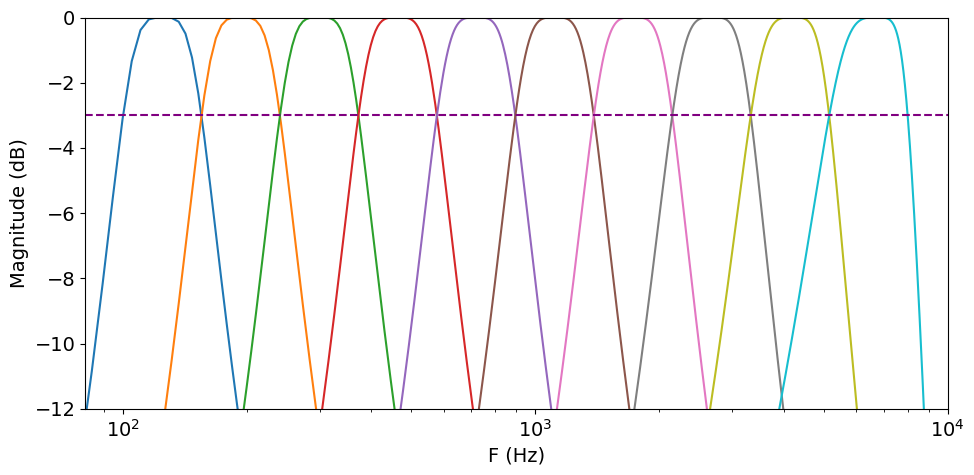

In [8]:
sampling_rate = 21000 

filters = [] 
for i in range(num_filters): # 0-10
    
    low = border_frequencies[i] / (sampling_rate / 2)
    high = border_frequencies[i + 1] / (sampling_rate / 2)
    b, a = butter(N=2, Wn=[low, high], btype='band') # fourth-order Butterworth digital filter
    filters.append((b, a))


plt.figure(figsize=(10, 5))
for b, a in filters:
    w, h = freqz(b, a, worN=2000) # 2048
    magnitude_response = 20 * np.log10(abs(h))
    plt.semilogx(w * sampling_rate / (2 * np.pi), magnitude_response)
plt.axhline(y=-3, color='purple', linestyle='--', label='-3 dB') # 添加-3dB线作为参考线
plt.xlabel('F (Hz)')
plt.ylabel('Magnitude (dB)')
plt.ylim([-12, 0])  
plt.xscale('log') 
plt.xlim(81, 10000)
plt.xticks([100, 1000, 10000], ['$10^{2}$', '$10^{3}$', '$10^{4}$'])
plt.rcParams.update({'font.size': 15}) 
plt.tight_layout()
plt.show()


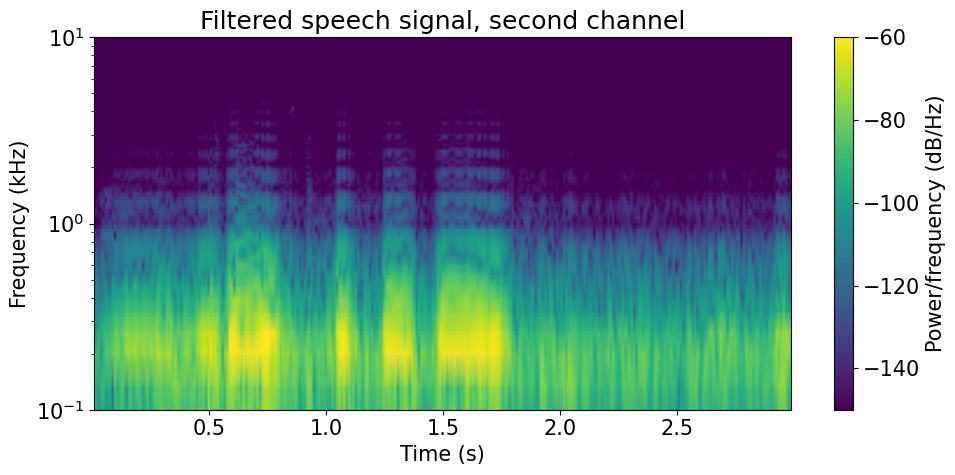

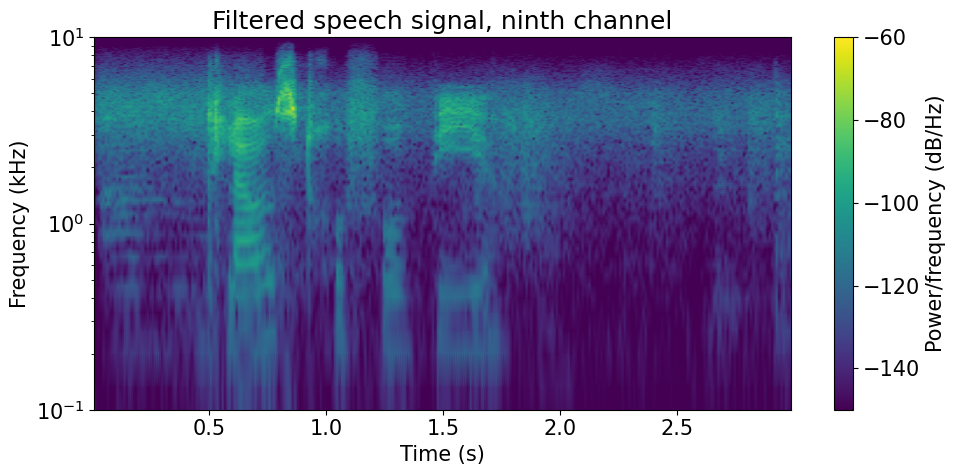

In [10]:
from scipy.io.wavfile import read as read_wav
from scipy.signal import butter, lfilter, freqz, spectrogram
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write, read # 保存录音为文件
fs_speech=21000
# fs_speech, speech_signal = read_wav("thresholded_voice_19.wav")
speech_signal = np.load("recorded_word.npy").flatten()


filtered_speech_signals = [lfilter(b, a, speech_signal) for b, a in filters]
filtered_noise_signals = [lfilter(b, a, white_noise) for b, a in filters]


# 选择第2个和第9个滤波器的信号进行可视化
for i in [1, 8]:
    # 计算并绘制语音信号的频谱图
    f, t, Sxx = spectrogram(filtered_speech_signals[i], fs_speech, nperseg=int(0.015 * fs_speech), noverlap=int(0.005 * fs_speech))
    plt.figure(figsize=(10, 5))
    plt.ylabel('Frequency (kHz)')
    plt.xlabel('Time (s)')  
    c = plt.pcolormesh(t, f*1e-3, 10 * np.log10(Sxx), shading='gouraud', vmin=-150, vmax=-60)
    plt.colorbar(c, label='Power/frequency (dB/Hz)')
    plt.yscale('log') # 设置对数刻度的y轴 使用对数刻度来更清晰地展示低频范围
    plt.ylim(0.1, 10)
    plt.yticks([0.1, 1, 10], ['$10^{-1}$', '$10^{0}$', '$10^{1}$']) # 使用LaTeX语法设置y轴的刻度标签
    if i == 1:
        plt.title(f'Filtered speech signal, second channel')
    elif i==8:
        plt.title(f'Filtered speech signal, ninth channel')
    plt.rcParams.update({'font.size': 15}) 
    plt.tight_layout()
    plt.show()


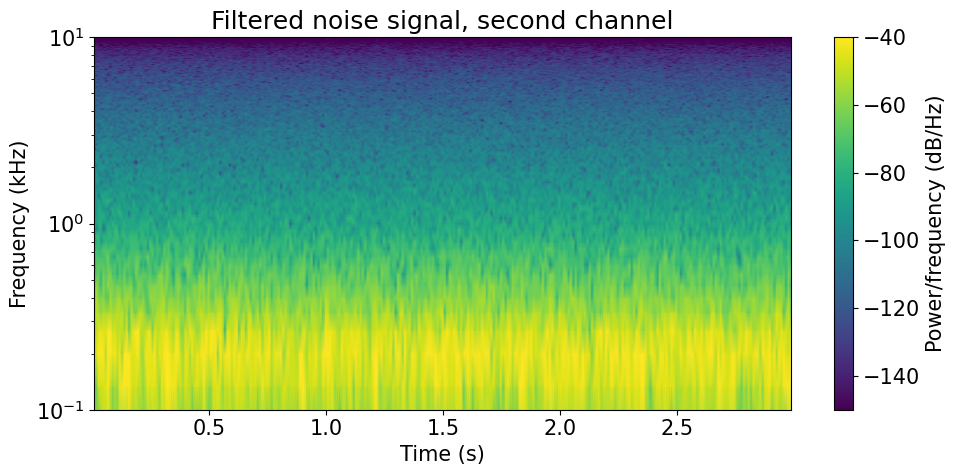

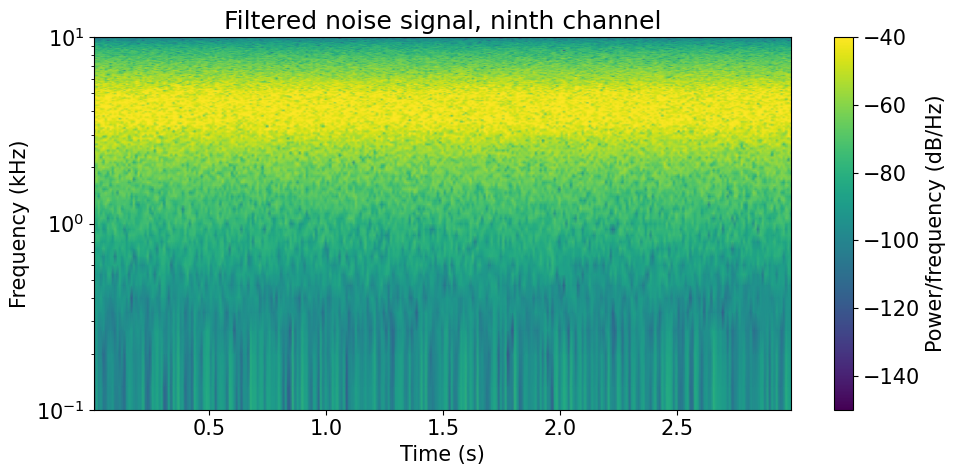

In [11]:
for i in [1, 8]:
    # 计算并绘制噪声信号的频谱图
    f, t, Sxx = spectrogram(filtered_noise_signals[i], fs_speech, nperseg=int(0.015 * fs_speech), noverlap=int(0.005 * fs_speech))
    plt.figure(figsize=(10, 5))
    plt.ylabel('Frequency (kHz)')
    plt.xlabel('Time (s)')
    c = plt.pcolormesh(t, f*1e-3, 10 * np.log10(Sxx), shading='gouraud', vmin=-150, vmax=-40)
    plt.colorbar(c, label='Power/frequency (dB/Hz)')
    plt.yscale('log') # 设置对数刻度的y轴 使用对数刻度来更清晰地展示低频范围
    plt.ylim(0.1, 10)
    plt.yticks([0.1, 1, 10], ['$10^{-1}$', '$10^{0}$', '$10^{1}$']) # 使用LaTeX语法设置y轴的刻度标签
#     plt.title(f'Filtered noise signal, {i+1} channel')
    if i == 1:
        plt.title(f'Filtered noise signal, second channel')
    elif i==8:
        plt.title(f'Filtered noise signal, ninth channel')
    plt.rcParams.update({'font.size': 15}) 
    plt.tight_layout()
    plt.show()

In [250]:
from scipy.io.wavfile import read as read_wav
from scipy.signal import butter, lfilter, freqz, spectrogram
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write, read 

second_channel_speech = filtered_speech_signals[1]
ninth_channel_speech = filtered_speech_signals[8]

#scale_factor_speech = np.iinfo(np.int16).max / np.max(np.abs(filtered_speech_signals)) # 检查信号的最大值，并将其放大到int16的最大值范围
#second_channel_speech_normalized = second_channel_speech * scale_factor_speech
#ninth_channel_speech_normalized = ninth_channel_speech * scale_factor_speech

write("second_channel_speech_20.wav", fs_speech, second_channel_speech)
write("ninth_channel_speech_20.wav", fs_speech, ninth_channel_speech)

print("Saved filtered speech signals to 'second_channel_speech.wav' and 'ninth_channel_speech.wav'")

Saved filtered speech signals to 'second_channel_speech.wav' and 'ninth_channel_speech.wav'


In [251]:
from scipy.io.wavfile import read as read_wav
from scipy.signal import butter, lfilter, freqz, spectrogram
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write, read

second_channel_noise = filtered_noise_signals[1]  
ninth_channel_noise = filtered_noise_signals[8]   

scale_factor_noise = np.iinfo(np.int16).max / np.max(np.abs(filtered_noise_signals)) # 规范化处理以适应WAV文件的幅度范围
second_channel_noise_normalized = second_channel_noise * scale_factor_noise
ninth_channel_noise_normalized = ninth_channel_noise * scale_factor_noise

write("second_channel_noise_15.wav", fs_speech, second_channel_noise_normalized.astype(np.int16))
write("ninth_channel_noise_15.wav", fs_speech, ninth_channel_noise_normalized.astype(np.int16))

print("Saved filtered noise signals to 'second_channel_speech.wav' and 'ninth_channel_speech.wav'")

Saved filtered noise signals to 'second_channel_speech.wav' and 'ninth_channel_speech.wav'


In [265]:
filtered_speech_signals = [lfilter(b, a, speech_signal) for b, a in filters]
np.array(filtered_speech_signals).shape

(10, 63000)

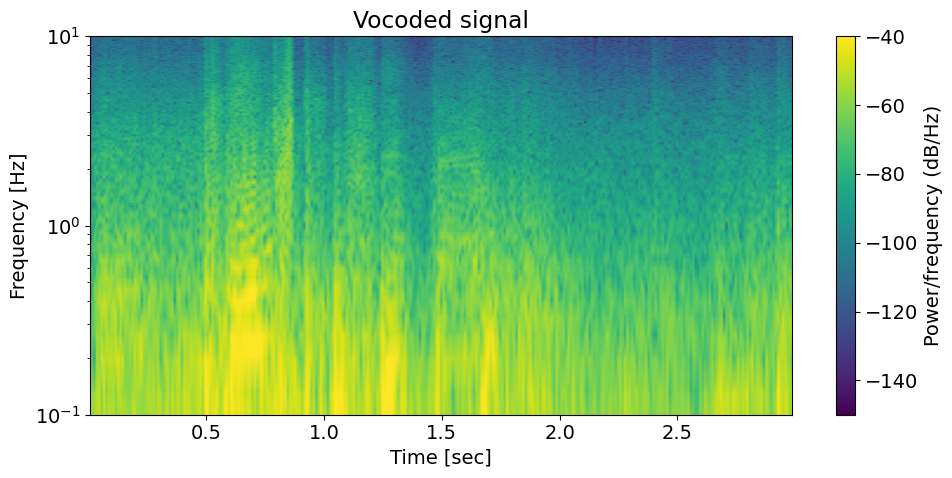

In [15]:
import numpy as np
from scipy.io.wavfile import write, read
from scipy.signal import butter, lfilter, hilbert, spectrogram
import matplotlib.pyplot as plt

# sampling_rate, speech_signal = read("thresholded_voice_19.wav")
# speech_signal = speech_signal / np.max(speech_signal)
# #sampling_rate = 21000
# #speech_signal = np.load("recorded_word.npy").flatten()

# filtered_speech_signals = [lfilter(b, a, speech_signal) for b, a in filters]
# filtered_noise_signals = [lfilter(b, a, white_noise) for b, a in filters]

# filtered_speech_signals = np.array(filtered_speech_signals)

envelopes = [np.abs(hilbert(filtered_signal)) for filtered_signal in filtered_speech_signals]

compressed_envelopes = [np.log10(1 + 300 * env) / np.log10(1 + 300) for env in envelopes]

modulated_signals = [env * noise for (env, noise) in zip(compressed_envelopes, white_noise)]
modulated_signals = np.array(modulated_signals)

vocoded_signal = np.sum(modulated_signals, axis=0)
#vocoded_signal = np.int16(vocoded_signal / np.max(np.abs(vocoded_signal)) * 32767)

# vocoded_signal_new = vocoded_signal.reshape(1, 63000)

write('vocoded_signal_48.wav', sampling_rate, vocoded_signal)

plt.figure(figsize=(10, 5))
frequencies, times, Sxx = spectrogram(vocoded_signal, sampling_rate, nperseg=int(0.015 * sampling_rate), noverlap=int(0.005 * sampling_rate))
c = plt.pcolormesh(times, frequencies*1e-3, 10 * np.log10(Sxx), shading='gouraud', vmin=-150, vmax=-40)
plt.colorbar(c, label='Power/frequency (dB/Hz)')
plt.yscale('log') 
plt.ylim(0.1, 10)
plt.yticks([0.1, 1, 10], ['$10^{-1}$', '$10^{0}$', '$10^{1}$'])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Vocoded signal")
plt.tight_layout()
plt.show()

In [238]:
vocoded_signal_new.shape

(1, 63000)

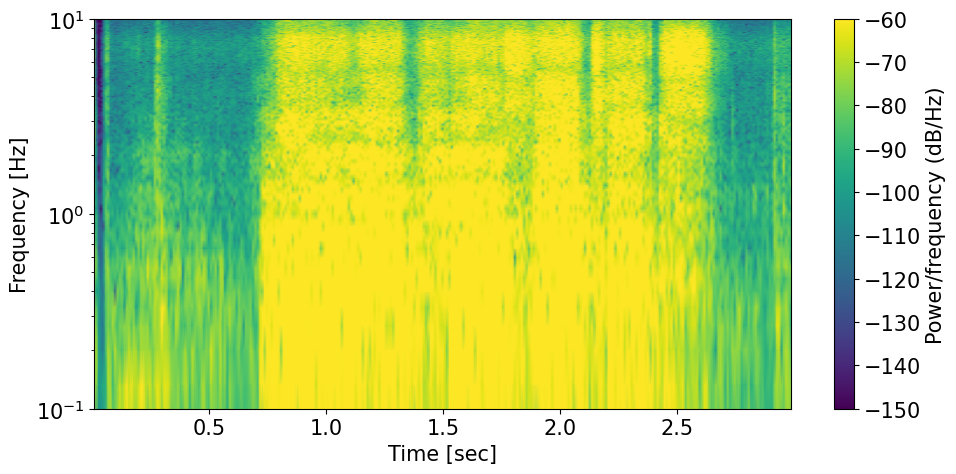

In [188]:
import numpy as np
from scipy.io.wavfile import write, read
from scipy.signal import butter, lfilter, hilbert, spectrogram
import matplotlib.pyplot as plt

sampling_rate, speech_signal = read("Neuroprosthetics_15.wav")
# speech_signal = speech_signal / np.max(np.abs(speech_signal))  # 归一化信号

# white_noise = np.random.normal(0, 1, speech_signal.shape)
start_freq = 100
end_freq = 8000
num_filters = 10
border_frequencies = np.logspace(np.log10(start_freq), np.log10(end_freq), num_filters + 1)
sampling_rate = 21000
# filters = []

# # 创建滤波器
# for i in range(num_filters):
#     low = border_frequencies[i] / (sampling_rate / 2)
#     high = border_frequencies[i + 1] / (sampling_rate / 2)
#     b, a = butter(N=2, Wn=[low, high], btype='band')
#     filters.append((b, a))

# 过滤语音和白噪声
filtered_speech_signals = [lfilter(b, a, speech_signal) for b, a in filters]
filtered_noise_signals = [lfilter(b, a, white_noise) for b, a in filters]

# 使用希尔伯特变换提取包络，并进行检查
envelopes = [np.abs(hilbert(filtered_signal)) for filtered_signal in filtered_speech_signals]
# for i, env in enumerate(envelopes):
#     if np.all(env == 0):
#         print(f"Envelope {i} is empty. Something went wrong with the filtering or Hilbert transform.")

# 应用压缩并进行检查
compressed_envelopes = [np.log10(1 + 300 * env) / np.log10(1 + 300) for env in envelopes]
# for i, comp_env in enumerate(compressed_envelopes):
#     if np.all(comp_env == 0):
#         print(f"Compressed envelope {i} is empty. The compression might be too aggressive or the envelope is incorrect.")

# 调制带限噪声并检查结果
modulated_signals = [env * noise for env, noise in zip(compressed_envelopes, filtered_noise_signals)]
# for i, mod_sig in enumerate(modulated_signals):
#     if np.all(mod_sig == 0):
#         print(f"Modulated signal {i} is empty. Something went wrong with the modulation.")

# 合成Vocoder信号并进行归一化
vocoded_signal = np.sum(modulated_signals, axis=0)
# if np.all(vocoded_signal == 0):
#     print("The vocoded signal is empty after modulation. Check the previous steps.")

# 放大信号到原始信号的相同幅度级别
# vocoded_signal = np.int16(vocoded_signal / np.max(np.abs(vocoded_signal)) * 32767)

# 保存Vocoder信号到文件
write('vocoded_signal_4.wav', sampling_rate, vocoded_signal)


# 绘制原始语音信号的频谱图
# frequencies, times, Sxx = spectrogram(speech_signal, sampling_rate, nperseg=int(0.015 * sampling_rate), noverlap=int(0.005 * sampling_rate))
plt.figure(figsize=(10, 5))
# plt.subplot(2, 1, 1)
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# c = plt.pcolormesh(times, frequencies*1e-3, 10 * np.log10(Sxx), shading='gouraud', vmin=-150, vmax=-40)
# plt.colorbar(c, label='Power/frequency (dB/Hz)')
# plt.yscale('log') # 设置对数刻度的y轴 使用对数刻度来更清晰地展示低频范围
# plt.ylim(0.1, 10)
# plt.yticks([0.1, 1, 10], ['$10^{-1}$', '$10^{0}$', '$10^{1}$']) # 使用LaTeX语法设置y轴的刻度标签
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')

# 绘制Vocoder信号的频谱图
frequencies, times, Sxx = spectrogram(vocoded_signal, sampling_rate, nperseg=int(0.015 * sampling_rate), noverlap=int(0.005 * sampling_rate))
# plt.subplot(2, 1, 2)
c = plt.pcolormesh(times, frequencies*1e-3, 10 * np.log10(Sxx), shading='gouraud', vmin=-150, vmax=-60)
plt.colorbar(c, label='Power/frequency (dB/Hz)')
plt.yscale('log') # 设置对数刻度的y轴 使用对数刻度来更清晰地展示低频范围
plt.ylim(0.1, 10)
plt.yticks([0.1, 1, 10], ['$10^{-1}$', '$10^{0}$', '$10^{1}$']) # 使用LaTeX语法设置y轴的刻度标签
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
# plt.colorbar(label='Power/frequency (dB/Hz)')
plt.tight_layout()
plt.show()


In [84]:
pip install soundfile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


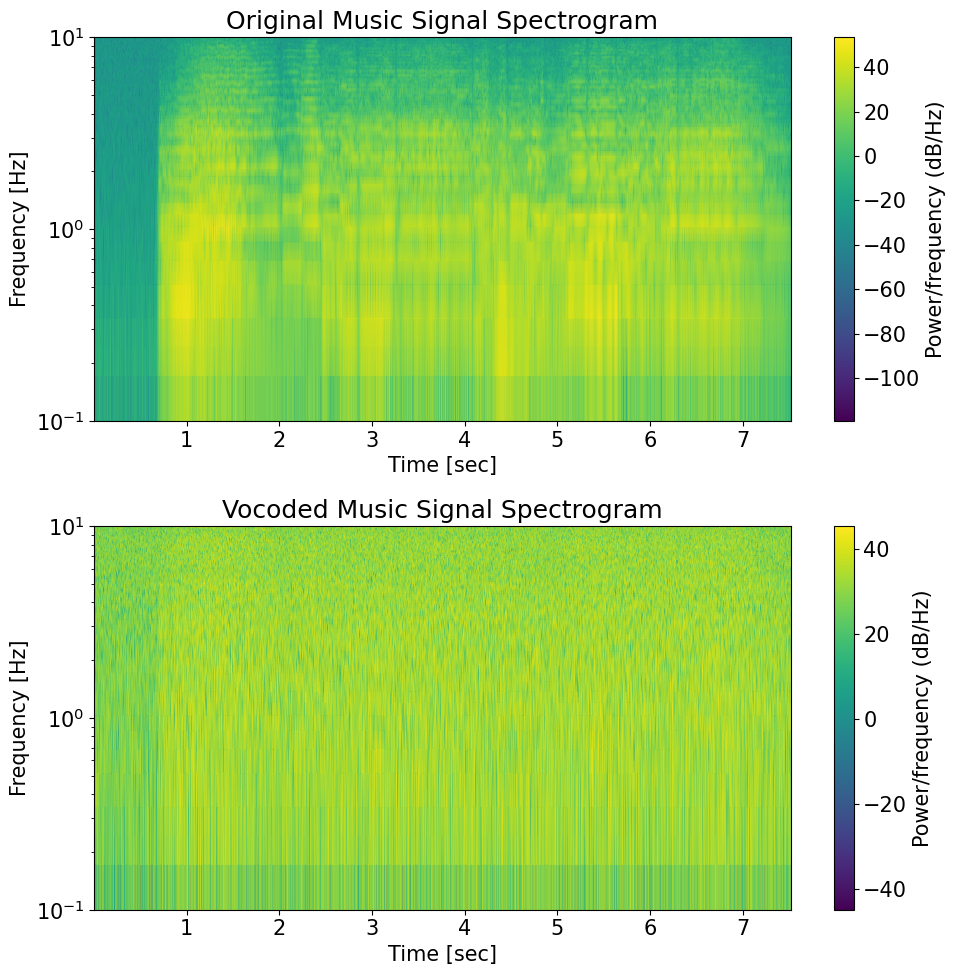

In [43]:
import numpy as np
import soundfile as sf
from scipy.signal import butter, lfilter, hilbert, spectrogram
from scipy.io.wavfile import read, write
import matplotlib.pyplot as plt
    
# Read the music file (replace 'music_sample.wav' with your actual music file path)
music_sampling_rate, music_signal = read('music_sample.wav')

# Check if the signal is stereo (multi-channel) and convert to mono if necessary
if music_signal.ndim > 1 and music_signal.shape[1] > 1:  # Check for stereo
    music_signal = np.mean(music_signal, axis=1)  # Convert to mono by averaging the channels


# Define the number of filters and filter order
num_filters = 12  # The typical number of channels for a CI
filter_order = 2  # A lower filter order emulates the spread of excitation in a CI

# Define the frequency bands based on the music sampling rate
start_freq = 100
end_freq = music_sampling_rate / 2  # Nyquist frequency
border_frequencies = np.logspace(np.log10(start_freq), np.log10(end_freq), num_filters + 1)

# Create filters for the vocoder
filters = []
for i in range(num_filters):
    low = border_frequencies[i] / (music_sampling_rate / 2)
    high = border_frequencies[i + 1] / (music_sampling_rate / 2)
    b, a = butter(filter_order, [low, high], btype='band')
    filters.append((b, a))

# Filter the music signal and create white noise bands
filtered_music_signals = [lfilter(b, a, music_signal) for b, a in filters]
filtered_noise_signals = [lfilter(b, a, np.random.normal(0, 1, len(music_signal))) for b, a in filters]

# Extract the envelope and apply compression
envelopes = [np.abs(hilbert(filtered_signal)) for filtered_signal in filtered_music_signals]
compressed_envelopes = [np.log10(1 + 300 * env) / np.log10(1 + 300) for env in envelopes]

# Modulate the filtered noise with the compressed envelopes
modulated_signals = [env * noise for env, noise in zip(compressed_envelopes, filtered_noise_signals)]

# Sum up all the modulated signals to create the final vocoded signal
vocoded_signal = np.sum(modulated_signals, axis=0)
# Ensure the signal is in the proper range for int16
vocoded_signal = np.int16(vocoded_signal / np.max(np.abs(vocoded_signal)) * 32767)

# Save the vocoded signal to a file
# sf.write('vocoded_music.wav', vocoded_signal, music_sampling_rate)
write('vocoded_music.wav', music_sampling_rate, np.int16(vocoded_signal / np.max(np.abs(vocoded_signal)) * 32767))


# Plot the original and vocoded signal spectrograms
f, t, Sxx_orig = spectrogram(music_signal, music_sampling_rate)
f, t, Sxx_vocoded = spectrogram(vocoded_signal, music_sampling_rate)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.title('Original Music Signal Spectrogram')
# plt.pcolormesh(t, f, 10 * np.log10(Sxx_orig))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
# plt.colorbar(label='Power/frequency (dB/Hz)')
c = plt.pcolormesh(t, f*1e-3, 10 * np.log10(Sxx_orig), shading='gouraud')
plt.colorbar(c, label='Power/frequency (dB/Hz)')
plt.yscale('log') # 设置对数刻度的y轴 使用对数刻度来更清晰地展示低频范围
plt.ylim(0.1, 10)
plt.yticks([0.1, 1, 10], ['$10^{-1}$', '$10^{0}$', '$10^{1}$']) # 使用LaTeX语法设置y轴的刻度标签



plt.subplot(2, 1, 2)
plt.title('Vocoded Music Signal Spectrogram')
# plt.pcolormesh(t, f, 10 * np.log10(Sxx_vocoded))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
# plt.colorbar(label='Power/frequency (dB/Hz)')
c = plt.pcolormesh(t, f*1e-3, 10 * np.log10(Sxx_vocoded), shading='gouraud')
plt.colorbar(c, label='Power/frequency (dB/Hz)')
plt.yscale('log') # 设置对数刻度的y轴 使用对数刻度来更清晰地展示低频范围
plt.ylim(0.1, 10)
plt.yticks([0.1, 1, 10], ['$10^{-1}$', '$10^{0}$', '$10^{1}$']) # 使用LaTeX语法设置y轴的刻度标签
plt.tight_layout()
plt.show()
